In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates
import plotly.express as px
import seaborn as sns

In [2]:
# loading dataset
globals().update({f"df_{year}": pd.read_csv(f"dataset/{year}.csv") for year in range(2015, 2020)})

In [3]:
# for 2015 and 2016
df_list_1 = [df_2015, df_2016]  

for df in df_list_1:
    df.columns = [x.strip().replace(' ', '_').lower() for x in df.columns]
    df.rename(columns={'economy_(gdp_per_capita)': 'economy', 'health_(life_expectancy)': 'health', 'trust_(government_corruption)': 'trust'}, inplace=True)

In [4]:
# for 2017
df_2017.columns = [x.strip().replace('.', '_').lower() for x in df_2017.columns]
df_2017.rename(columns={'economy__gdp_per_capita_': 'economy', 'health__life_expectancy_': 'health', 'trust__government_corruption_': 'trust'}, inplace=True)

In [5]:
# for 2018 an 2019
df_list_2 = [df_2018, df_2019]
for df in df_list_2:
    df.columns = [x.strip().replace(' ', '_').lower() for x in df.columns]
    df.rename(columns={'overall_rank': 'happiness_rank', 'country_or_region': 'country', 'score': 'happiness_score', 'gdp_per_capita': 'economy', 'healthy_life_expectancy': 'health', 'freedom_to_make_life_choices': 'freedom', 'perceptions_of_corruption': 'trust'}, inplace=True)

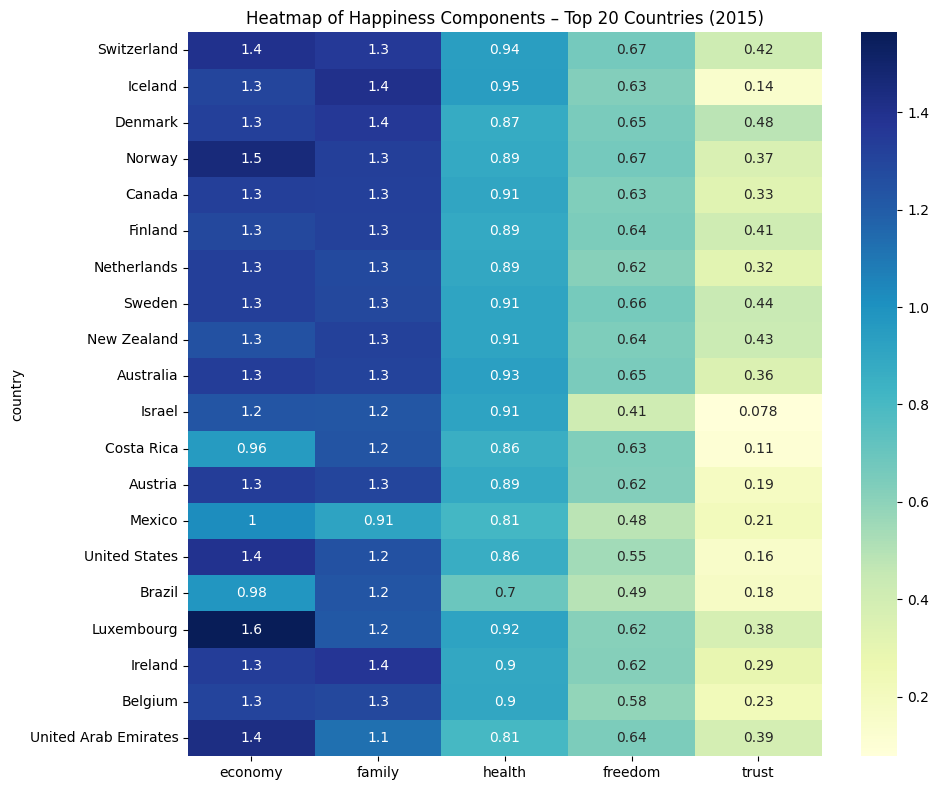

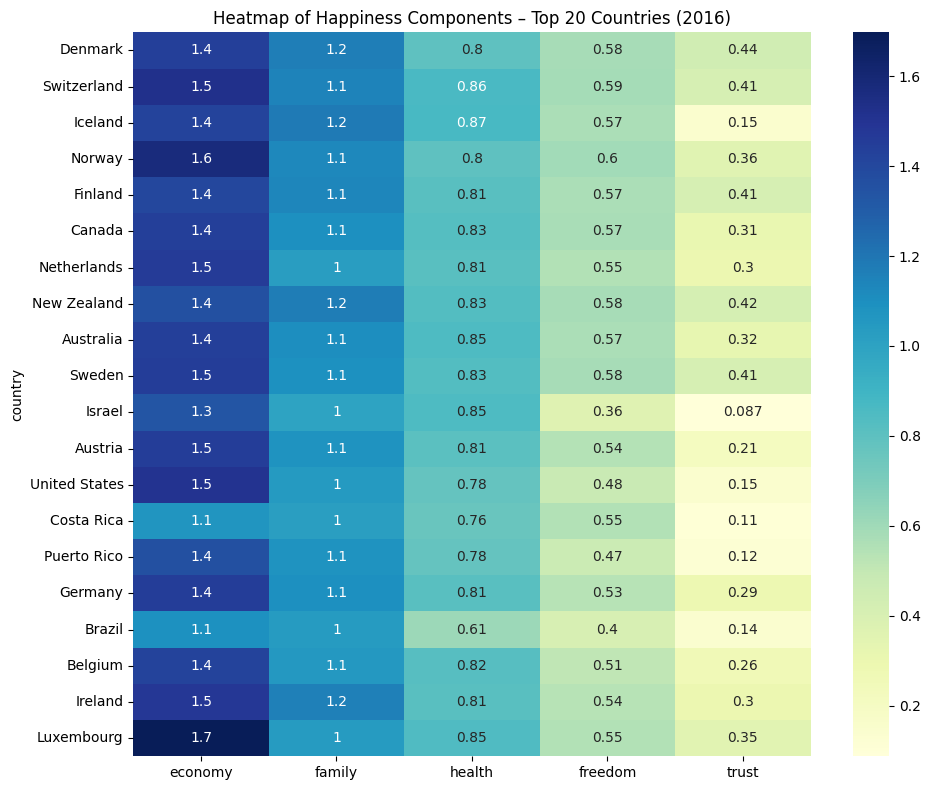

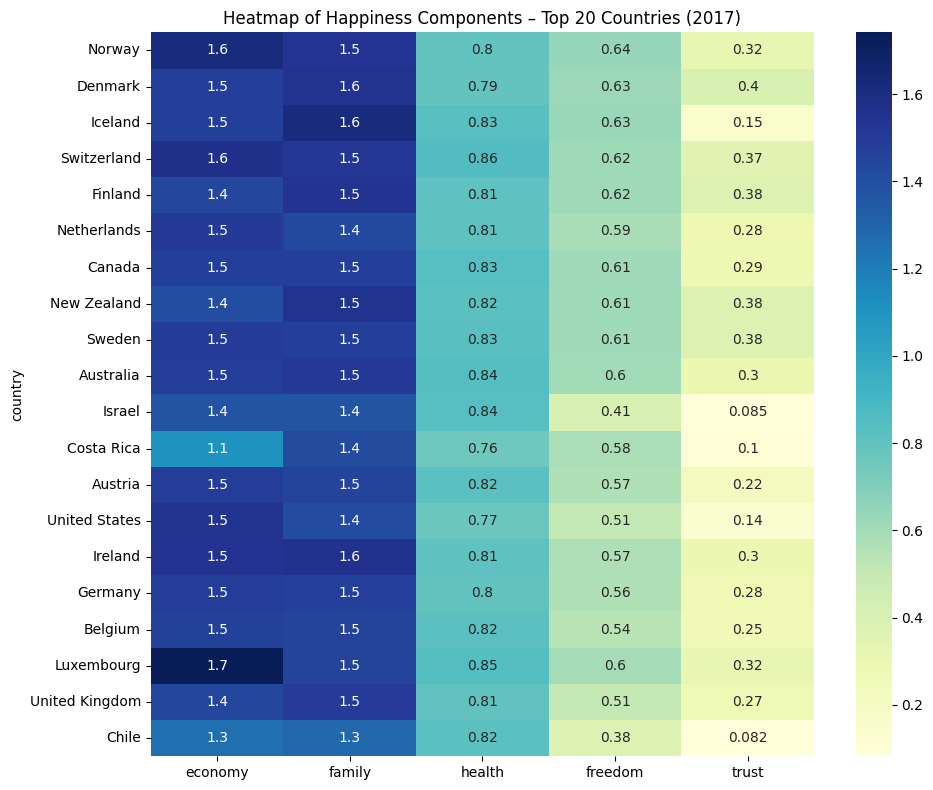

[2018] Missing component columns: {'family'}


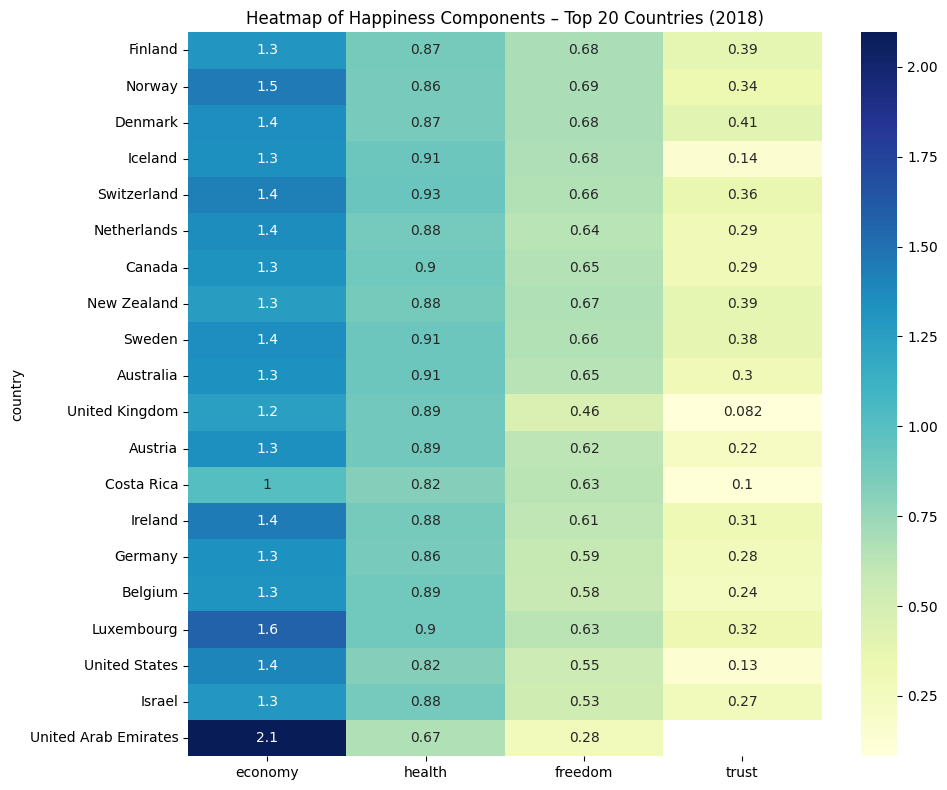

[2019] Missing component columns: {'family'}


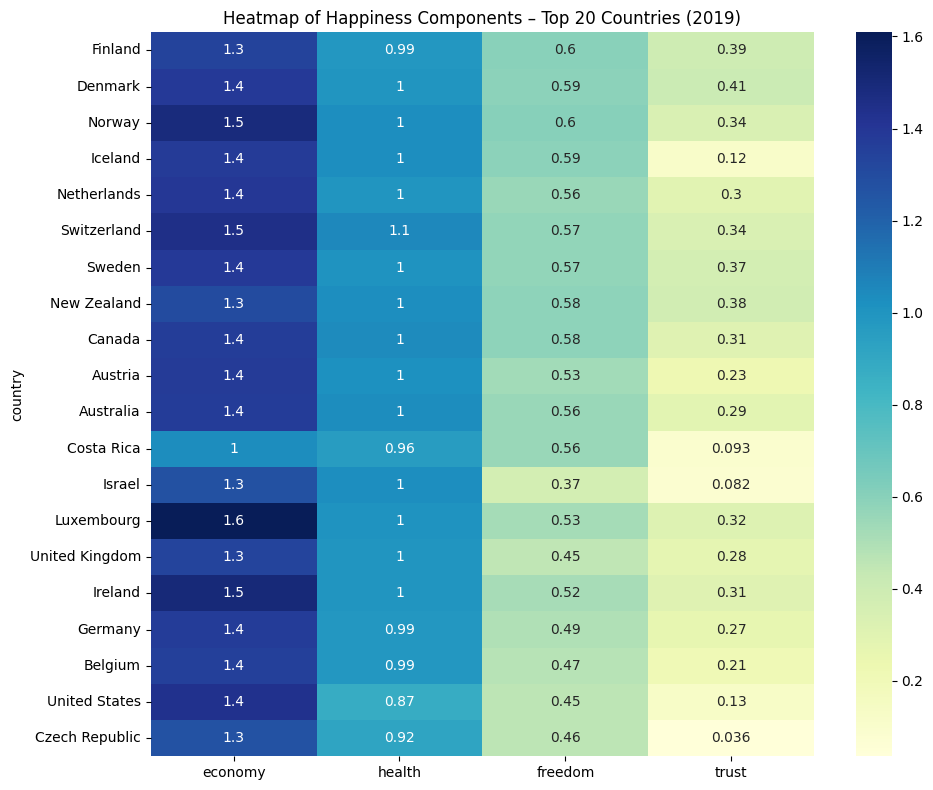

In [6]:

years = [2015, 2016, 2017, 2018, 2019]  # List of years corresponding to DataFrames
df_list = [df_2015, df_2016, df_2017, df_2018, df_2019] 


def create_visuals(df_list, years):

    # happiness score
    # interactive plot
    fig = px.bar(df.sort_values('happiness_score', ascending=False),
                 x='happiness_score', y='country',
                 color='region' if year not in [2017, 2018, 2019] else 'happiness_score',
                 orientation='h',
                 title=f'Happiness Scores by Country ({year})')
    fig.update_layout(width=1800, height=1200) 
    fig.show()

    # choropleth map
    fig = px.choropleth(df,
                    locations="country",
                    locationmode="country names",
                    color="happiness_score",
                    hover_name="country",
                    color_continuous_scale="Viridis",
                    title=f"World Happiness Score ({year})")

    fig.update_layout(width=1600, height=800)
    fig.show()

    # component breakdown
    all_components = ['economy', 'family', 'health', 'freedom', 'trust']
    components = [c for c in all_components if c in df.columns]
    missing = set(all_components) - set(df.columns)
    if missing:
        print(f"[{year}] Missing component columns: {missing}")

    # heat map (country x components)
    top_n = df.sort_values('happiness_score', ascending=False).head(20)
    plt.figure(figsize=(10, 8))
    sns.heatmap(top_n.set_index('country')[components], annot=True, cmap='YlGnBu')
    plt.title(f"Heatmap of Happiness Components – Top 20 Countries ({year})")
    plt.tight_layout()
    plt.show()

    # interactive plot
    melted = df.melt(id_vars='country', value_vars=components, var_name='components', value_name='Score')
    top_20 = df.nlargest(20, 'happiness_score')['country']
    melted = melted[melted['country'].isin(top_20)]

    fig = px.bar(melted, x='Score', y='country', color='components', orientation='h', title=f'Happiness Component Breakdown (Top 20 Countries - {year})')
    fig.update_layout(barmode='stack', height=800, width=1000)
    fig.show()

for df, year in zip(df_list, years):
    create_visuals(df, year)